## LOAN ELIGIBILITY PREDICTION USING MACHINE LEARNING ALGORITHM 

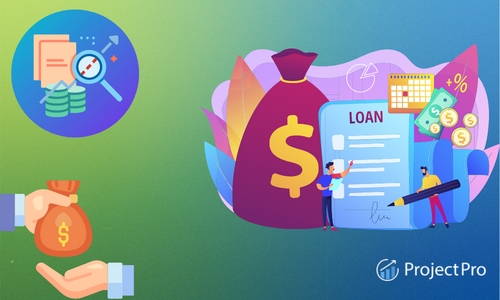

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the CSV file and printing first 10 data**

In [2]:
df = pd.read_csv("E:\SYMBIOSIS MSC DSSA\Loan_Data.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


**Shape of the dataset**

In [3]:
df.shape

(614, 13)

**All column Names**

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Information of the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Total number of Null values or NaN**

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Total number of Duplicate values**

In [7]:
df.duplicated().sum()

0

**Statistical Summary of the dataset**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


**Determining which Credit History category of people got the Loan**

In [9]:
df.pivot_table(index='Credit_History',values='Loan_Status',aggfunc='count')

,Loan_Status
Credit_History,
0.0,89
1.0,475


Most of the people who have Credit History as 1, got the Loan approved.

**Countplot showing the educated male or female**

[]

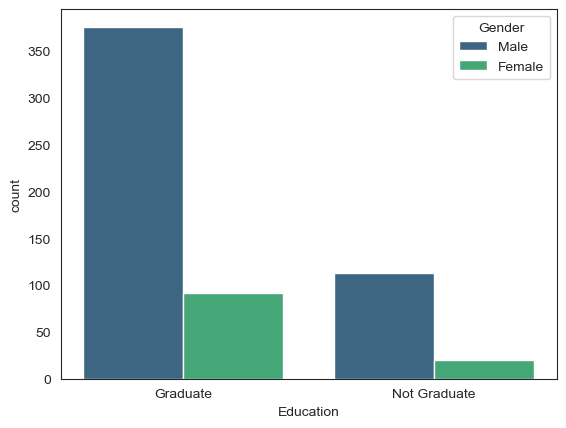

In [10]:
sns.set_style('white')
sns.countplot(x = df['Education'],data=df,hue=df['Gender'],palette='viridis')
plt.plot()

**Distribution showing the Income of the loan applicants based on the gender of applicants**

[]

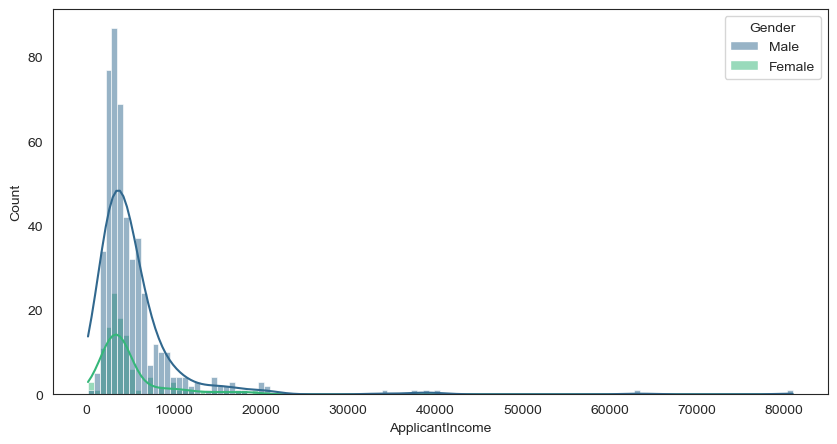

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(x = df['ApplicantIncome'],data=df,hue= df['Gender'],palette='viridis',kde=True)
plt.plot()

[]

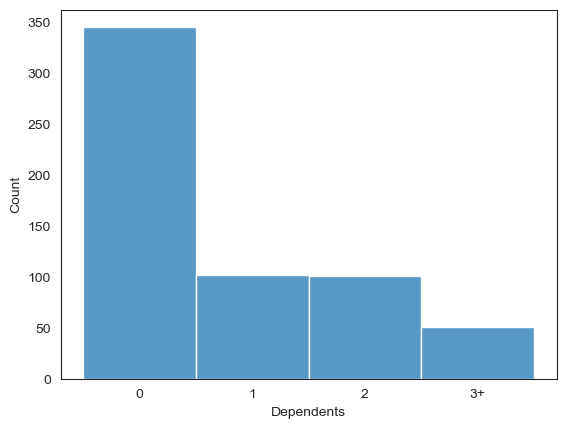

In [12]:
sns.set_style('white')
sns.histplot(x = df['Dependents'],data=df)
plt.plot()

[]

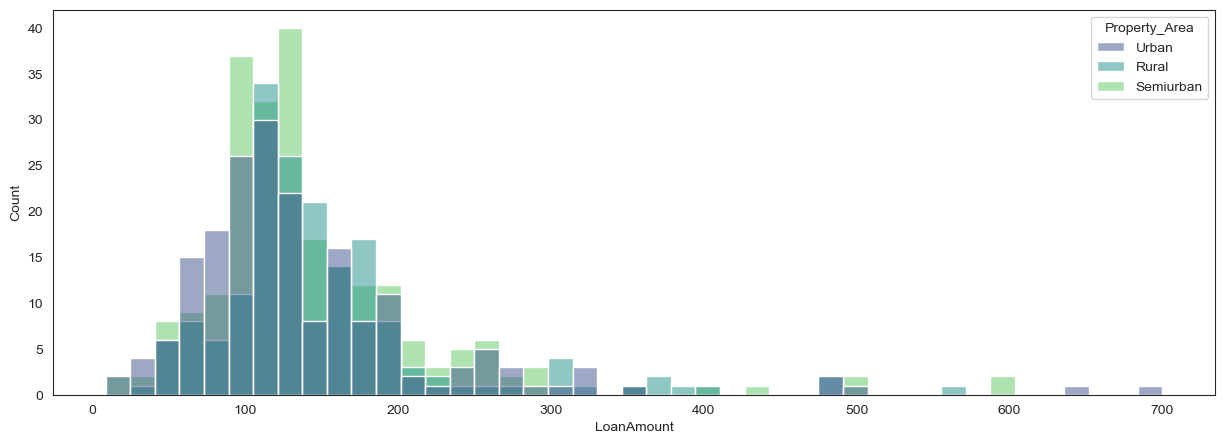

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(x = df['LoanAmount'],data=df,hue= df['Property_Area'],palette='viridis')
plt.plot()

**Feature seperation based on numerical columns**

In [14]:
num_col = [i for i in df.columns if df[i].dtype != 'object']
num_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [15]:
num_corr = df[num_col].corr()
num_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [16]:
num_df = df[num_col]

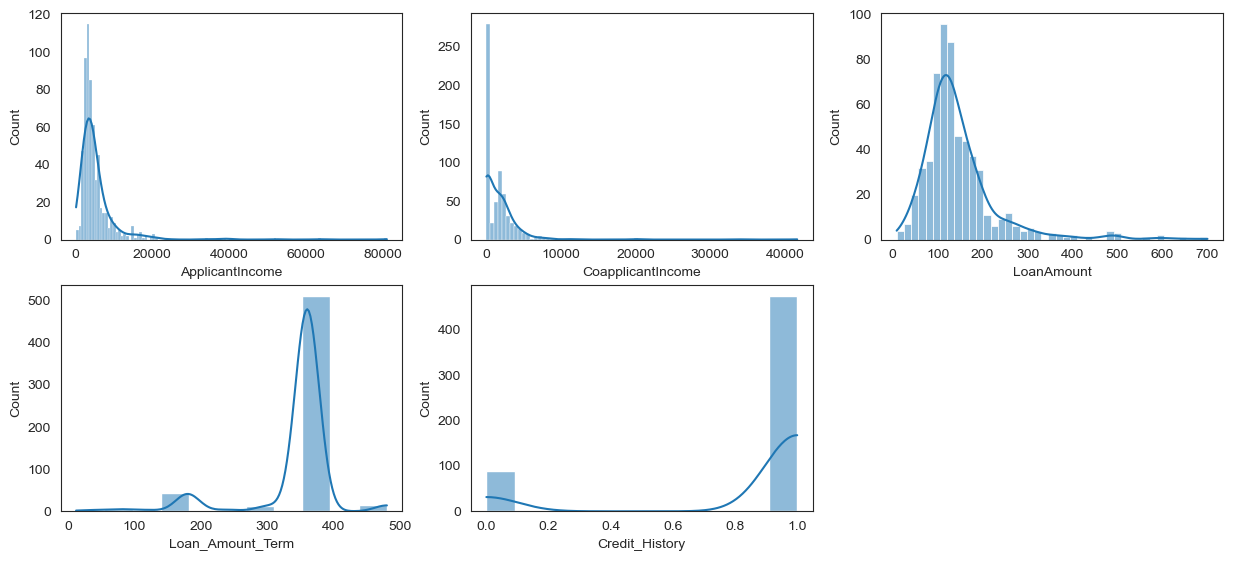

In [17]:
plt.figure(figsize=(15,10))
plot_position = 1
for i in num_col:
    plt.subplot(3, 3, plot_position)
    sns.histplot(x= num_df[i], kde=True)
    plot_position += 1
plt.show()

**Correlation Heatmap**

<Axes: >

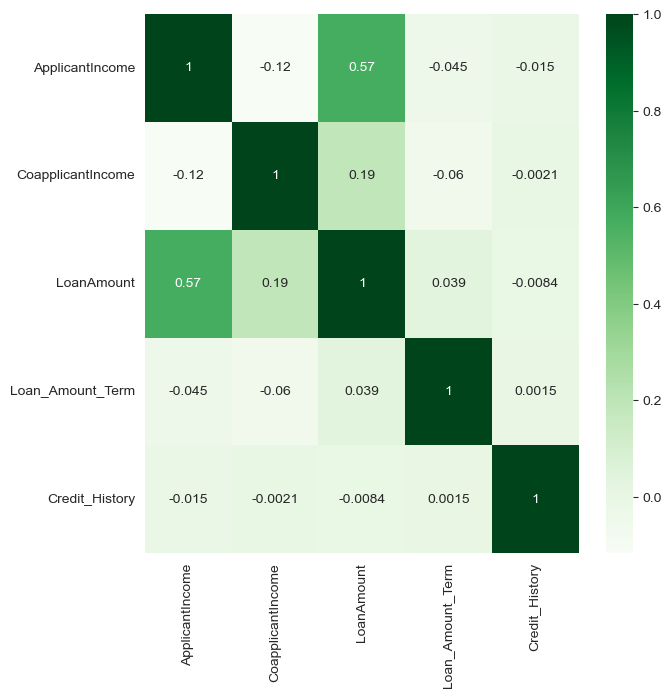

In [18]:
plt.figure(figsize=(7,7))
sns.heatmap(data= num_corr,cmap='Greens',annot=True)

**Eliminating Loan_ID column**

In [19]:
df = df.drop(['Loan_ID'],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Boxplot of the data**

<Axes: >

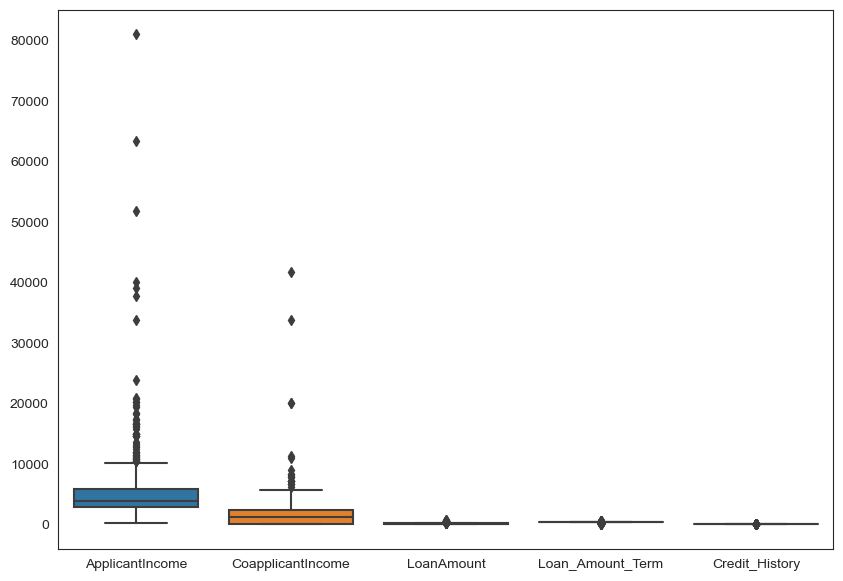

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df)

**Handling Missing Values**

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:
- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode
- There are very few missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.

In [21]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

We will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use the median to fill the null values as we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [22]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

Now for the Loan_Amount_Term, we will need to see which has the most occurance.

In [23]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [24]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

After handling all the missing values, now we will see whether there are any null values in the dataset

In [25]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Converting Male and Female into 1 and 0 respectively.**

In [26]:
dummy = {'Male':1 , 'Female':0}
df['Gender'] = df['Gender'].map(dummy)

**Converting Married and Not Married into 1 and 0 respectively.**

In [27]:
dummy1 = {'Yes':1, 'No':0}
df['Married'] = df['Married'].map(dummy1)

**Converting Graduate and Not Graduate into 1 and 0 respectively.**

In [28]:
dummy2 = {'Graduate':1, 'Not Graduate':0}
df['Education'] = df['Education'].map(dummy2)

**Converting Yes and No of Self_Employed column into 1 and 0 respectively.**

In [29]:
dummy3 = {'Yes':1,'No':0}
df['Self_Employed'] = df['Self_Employed'].map(dummy3)

**Converting The Property_Area into dummies.**

In [30]:
dummy4 = {'Urban':2,'Semiurban':1,'Rural':0}
df['Property_Area'] = df['Property_Area'].map(dummy4)

**Converting the Loan_Status Yes and No into 1 and 0 respectively.**

In [31]:
dummy5 = {'Y':1,'N':0}
df['Loan_Status'] = df['Loan_Status'].map(dummy5)

In [32]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3+,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0


In [33]:
x = df.drop(['Loan_Status','Dependents'],axis = 1)
y = df['Loan_Status']

**MACHINE LEARNING ALGORITHMS**
- **Decision Tree Classifier**
- **Naive Bayes**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Scaler Transformation**

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

**Decision Tree Classifier**

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=42)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [37]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,Y_test)
print("The accuracy of Decision Tree Classifier is ",accuracy)

The accuracy of Decision Tree Classifier is  0.6178861788617886


**Naive Bayes**

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [40]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [41]:
print("The accuracy of the Naive Bayes Classifier is",accuracy_score(y_pred,Y_test))

The accuracy of the Naive Bayes Classifier is 0.7642276422764228


**ACCURACY COMPARISON**

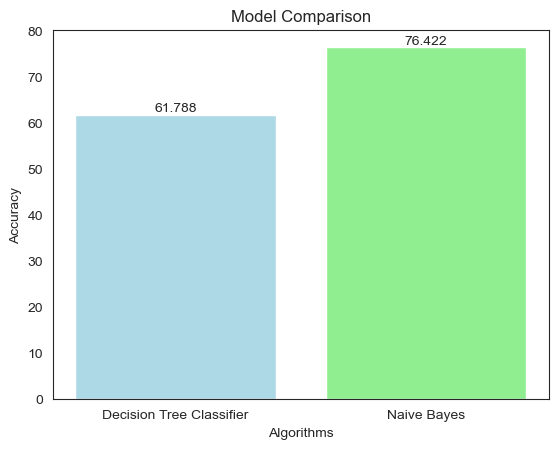

In [42]:
algorithms =["Decision Tree Classifier","Naive Bayes"]
accuracy=[61.788,76.422]

for i in range(len(algorithms)):
    plt.text(algorithms[i], accuracy[i], str(accuracy[i]), ha='center', va='bottom')


# Plotting
plt.bar(algorithms,accuracy,color = ['lightblue', 'lightgreen'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()